In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [231]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [233]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [234]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [235]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Dropping columns

In [236]:
df1=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convert male to 1 and female to 0

In [237]:
df1['Sex'].replace('female',0,inplace=True)
df1['Sex'].replace('male',1,inplace=True)

In [238]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


C:\Users\91990\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\91990\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


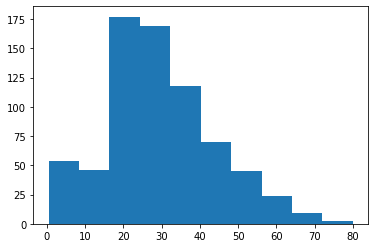

In [239]:
plt.hist(df["Age"]);


In [240]:

male_on_board=df1["Sex"].value_counts()[1] 
female_on_board=df1["Sex"].value_counts()[0]

In [241]:
df1.groupby("Sex")["Survived"].sum()

Sex
0    233
1    109
Name: Survived, dtype: int64

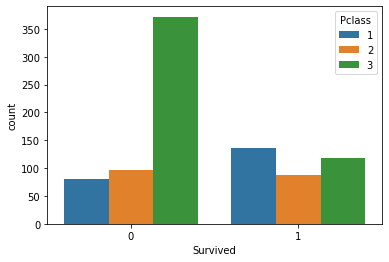

In [242]:
sns.countplot(x="Survived",data=df1,hue="Pclass");

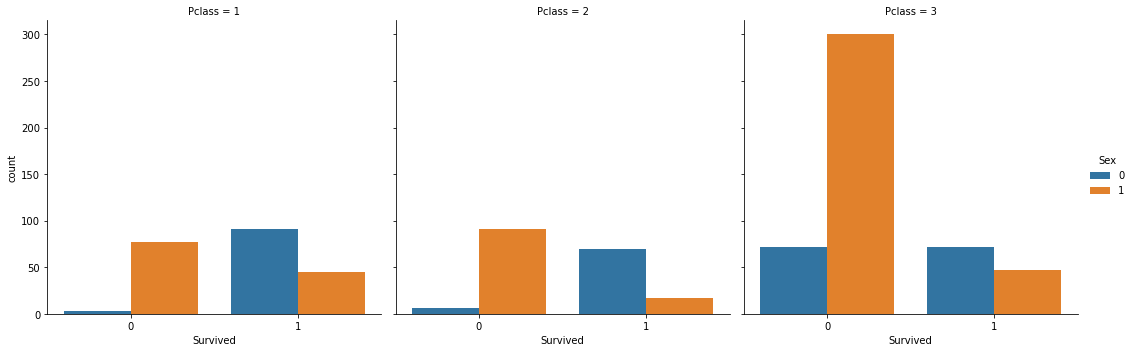

In [243]:
sns.catplot(x="Survived",kind="count",col="Pclass",hue="Sex",data=df1);


In [244]:
df1['Embarked'].replace('S',0,inplace=True)
df1['Embarked'].replace('C',1,inplace=True)
df1['Embarked'].replace('Q',1,inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


### Dealing with missing values



In [245]:
df1["Age"].fillna(df["Age"].mean(),inplace=True)
df1["Embarked"].fillna(1,inplace=True)

df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Model 

In [246]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [247]:
ss=StandardScaler()

df1[["Age","Fare"]]=ss.fit_transform(df1[["Age","Fare"]])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,0.0
1,1,1,0,0.638789,1,0,0.786845,1.0
2,1,3,0,-0.284663,0,0,-0.488854,0.0
3,1,1,0,0.407926,1,0,0.420730,0.0
4,0,3,1,0.407926,0,0,-0.486337,0.0


In [248]:
X=df1.drop("Survived",axis=1)
y=df1["Survived"]


In [249]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
classifiers=[("Decision Tree Classifier",dt),("KNN",knn),("SVC",svc)]

for clf_name,clf in classifiers:
    results=cross_val_score(clf,X,y,cv=5)
    print(clf_name," gives ",max(results))
    
svc.fit(X,y)

Decision Tree Classifier  gives  0.8033707865168539
KNN  gives  0.8314606741573034
SVC  gives  0.8426966292134831


SVC()

# Test data


In [250]:
df3=pd.read_csv("test.csv")
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
df4=df3.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [252]:
df4.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [253]:
df4['Sex'].replace('female',0,inplace=True)
df4['Sex'].replace('male',1,inplace=True)

In [254]:
df4['Embarked'].replace('S',0,inplace=True)
df4['Embarked'].replace('C',1,inplace=True)
df4['Embarked'].replace('Q',1,inplace=True)
df4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [255]:
df4["Age"].fillna(df4["Age"].mean(),inplace=True)
df4["Embarked"].fillna(1,inplace=True)
df4["Fare"].fillna(df4["Fare"].mean(),inplace=True)
df4.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [256]:
ss=StandardScaler()

df4[["Age","Fare"]]=ss.fit_transform(df4[["Age","Fare"]])
df4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.334993,0,0,-0.498407,1
1,3,0,1.325530,1,0,-0.513274,0
2,2,1,2.514175,0,0,-0.465088,1
3,3,1,-0.259330,0,0,-0.483466,0
4,3,0,-0.655545,1,1,-0.418471,0


In [258]:

y_pred=svc.predict(df4)



In [259]:
final=pd.DataFrame({"PassengerId":df3["PassengerId"],
                    "Survived":y_pred})
final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [260]:
final.to_csv("Submission1.csv",index=False)

# 